NA 50,NB 500,N 550,L 2.939282190837064
ori
effective ka 0.01 Pa 0.0028986264423934292 rv 0.005 
sinf 0.28701802418434863 14.350901209217431 7.0
new
effective ka 0.009958797172022065 Pa 0.002874789609539014 rv 0.0051045 
sinf 0.28764995939808496 14.382497969904248 14.0


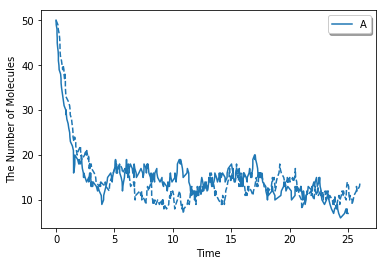

In [13]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
import sys
from math import sqrt,pi
import matplotlib.pyplot as plt
from ecell4.extra import ensemble
import numpy as np

def singlerun(ka,kd,paform,NA,NB,L,run,durfac):
    rng = GSLRandomNumberGenerator()
    rng.seed(run)
    factor = (2 * sqrt(2.0) + 4 * sqrt(3.0) + 3 * sqrt(6.0) + sqrt(22.0))**2/(72 * (6 * sqrt(2.0) + 4 * sqrt(3.0) + 3 * sqrt(6.0)))
    R=2*rm
    f=1
    kaori = ka
    Pa=kaori*factor/D
    if paform=='new':
        f = 1.0209
        PP=1./(1+math.sqrt(3)*(math.log(f*f/12)+(4*math.pi*D/ka)-2*gamma)/2/math.pi)
        ka = PP*D/factor    
        Pa= 1./(1+(sqrt(3)/2/pi)*(np.log(f*f/12)+(4*pi*D/ka)-2*gamma))            
    voxelr=rm*f
    td =(2*voxelr)**2/(4*D)
    duration=td*10**durfac
    H = 3*voxelr*2
    ori = Real3(0.5*H,0,0)
    unit0 = Real3(0,0,L)
    unit1 = Real3(0,L,0)        
    w = spatiocyte.SpatiocyteWorld(Real3(H,L,L),voxelr,rng)
    size=tuple(w.calculate_shape(Real3(H,L,L),voxelr))
    Nmv=size[1]*size[2]    
    #print('phil=',N/Nmv)
    Area=Nmv*(2*voxelr)**2
    c0=NB/Area
    sinf=kd/(kd+c0*kaori)
    print('effective ka {} Pa {} rv {} '.format(ka,Pa,voxelr))
    
    with species_attributes():
        A |  {'D': str(0), 'radius':str(voxelr),'location':'X'}
        B |  {'D': str(D), 'radius':str(voxelr),'location':'X'}
        C |  {'D': str(0), 'radius':str(voxelr),'location':'X'}

    with reaction_rules():#for spa and egfrd
        A + B == C | (ka,kd)
    m2 = get_model()
    w.bind_to(m2)
    w.add_structure(Species('X'),PlanarSurface(ori,unit0,unit1))
    w.add_molecules(Species('A'), NA)
    w.add_molecules(Species('B'), NB)
    sim = spatiocyte.SpatiocyteSimulator(w)
    sim.initialize()
    obs=NumberObserver(['A'])
    #obs = FixedIntervalNumberObserver(td,['A'])
    sim.run(duration,obs)
    tlogs,nlog=np.array(obs.data()).T     
    print('sinf',sinf,sinf*NA,nlog[-1])
    return obs#tlogs,nlog

gamma=0.5772157
D=1
rm = 0.005
NB=500
NA=int(0.1*NB)
N=NA+NB
phi=0.5/100
L=rm*sqrt(N*pi/phi)
print('NA {},NB {},N {},L {}'.format(NA,NB,N,L))
assert(NA>1)
K=0.05#ka/kd
durfac=6
simrun=1#300#000
kf = 0.01#ka/D
ka = kf*D
kd = ka/K
#x,y=singlerun(ka,kd,'new',NA,NB,L,run,durfac)
print('ori')
obs1 = singlerun(ka,kd,'ori',NA,NB,L,2,durfac)
#viz.plot_number_observer(obs1,'-')
print('new')
obs2 = singlerun(ka,kd,'new',NA,NB,L,2,durfac)
viz.plot_number_observer(obs1,'-',obs2,'--')
#plt.plot(x,y,label=name)
#plt.legend()    

In [16]:
0.5/((2*rm)**2/(4*D))

20000.0

In [ ]:
manual
[0, 0, 0, 0, 0]
[0.24989999999997656, 0.24992499999997655, 0.24994999999997655, 0.24997499999997655, 0.24999999999997655]
fixinterval
[ 5.  5.  5.  5.  5.]
[ 0.2499    0.249925  0.24995   0.249975  0.25    ]
NUmber observer
[ 3.  2.  1.  0.  0.]
[ 0.0722    0.075975  0.082375  0.135175  0.25    ]

In [13]:
import glob
import os.path

N=NA

def ldata(kf,name):
    kf=str(kf)
    #patterns='/home/chew/outputdata/2DRD/'+name+'/kfac'+kf+'/run*'
    patterns='/home/chew/outputdata/2DRD/'+name+'/kd'+kf+'/run*'
    fns=glob.glob(patterns)
    data = None
    for i, filename in enumerate(fns):
        #print('[{}/{}] {}'.format(i + 1, len(fns), filename))
        if data is None:
            data = np.loadtxt(filename, delimiter=',')
        else:
            data += np.loadtxt(filename, delimiter=',')
    data/=len(fns)  
    time = data.T[0]
    SP = data.T[1] / N
    return time,SP

In [14]:
#t10n,s10n=ldata(10,'newP')
#t01n,s01n=ldata(0.1,'newP')
#t10o,s10o=ldata(10,'oriP')
#t01o,s01o=ldata(0.1,'oriP')
t5o,s5o=ldata(5,'oriP')
t500o,s500o=ldata(500,'oriP')
t5n,s5n=ldata(5,'newP')
t500n,s500n=ldata(500,'newP')

KeyboardInterrupt: 

In [10]:
voxelr=0.005
H = 3*voxelr*2
w = spatiocyte.SpatiocyteWorld(Real3(H,L,L),voxelr)
size=tuple(w.calculate_shape(Real3(H,L,L),voxelr))
Nmv=size[1]*size[2]    
#print('phil=',N/Nmv)
Area=Nmv*(2*voxelr)**2
c0=NB/Area
#c0=NB/L/L
print('c0',c0)

c0 53.61125407445531


In [30]:
tp5,sp5=(np.loadtxt('/home/chew/outputdata/Fig.surface.reversible.kd5.mpk1.csv',delimiter=',')).T
tp500,sp500=(np.loadtxt('/home/chew/outputdata/Fig.surface.reversible.kd500.mpk1.csv',delimiter=',')).T

In [78]:
#TT500=np.array(TT500)
#ST500=np.array(ST500)

In [8]:
TT5=[1.00000000e-05, 1.66810054e-05, 2.78255940e-05 ,4.64158883e-05,
 7.74263683e-05, 1.29154967e-04 ,2.15443469e-04 ,3.59381366e-04,
 5.99484250e-04, 1.00000000e-03 ,1.00000000e-03 ,1.66810054e-03,
 2.78255940e-03, 4.64158883e-03 ,7.74263683e-03 ,1.29154967e-02,
 2.15443469e-02, 3.59381366e-02 ,5.99484250e-02 ,1.00000000e-01]
ST5=[9.90107036e-01, 9.83727020e-01, 9.73349506e-01, 9.56614234e-01,
 9.29955744e-01 ,8.88249532e-01 ,8.24749866e-01 ,7.32012920e-01,
 6.05051750e-01 ,4.47853509e-01 ,4.47984084e-01 ,2.81272819e-01,
 1.41133866e-01 ,5.61929891e-02 ,2.11438244e-02 ,9.62283053e-03,
 5.12229055e-03 ,2.89493303e-03 ,1.67936377e-03 ,9.87605737e-04]

In [11]:
def er(a,b):
    return (a-b)*100/a

def plotg(kd,c,x,y,name):
    sinf=kd/(kd+c*ka)
    print('{},kd={},Sinf={:.3f},Sim={:.3f},diff={:.2f}%'.format(name,kd,sinf,y[-1],er(sinf,y[-1])))
    if name=='ori':
        plt.semilogx(x,(y-sinf)/(1-sinf),'--',label=name+str(kd))
    elif name=='new':
        plt.semilogx(x,(y-sinf)/(1-sinf),'-',label=name+str(kd))    
    else:
        plt.semilogx(x,(y-sinf)/(1-sinf),'-.',label=name+str(kd))
c1=100
#plotg(5,c1,tp5,sp5,'paper')
plotg(5,c0,t5o,s5o,'ori')
plotg(5,c0,t5n,s5n,'new')

#plotg(500,c0,t500o,s500o,'ori')
plotg(500,c1,tp500,sp500,'paper')
plotg(500,c0,t500n,s500n,'new')
plt.plot(TT500,ST500,'-',label='theory500')
plt.plot(TT5,ST5,'-',label='theory5')
#plt.ylim(0,1.1)
plt.legend()

NameError: name 't5o' is not defined

(53.61125407445531, 62.5)